In [1]:
import ConstraintsExtraction
from ConstraintsExtraction import *

In [2]:
import ConstraintScalingProjection_LP 
import BregmanProjection
import KernelFDA 
import SC_MPI
import KISSME 
import imp




In [12]:


imp.reload(ConstraintScalingProjection_LP),imp.reload(KISSME),imp.reload(BregmanProjection),imp.reload(KernelFDA),imp.reload(SC_MPI)

(<module 'ConstraintScalingProjection_LP' from 'C:\\Users\\49048\\experiments for S2MDC\\ConstraintScalingProjection_LP.py'>,
 <module 'KISSME' from 'C:\\Users\\49048\\experiments for S2MDC\\KISSME.py'>,
 <module 'BregmanProjection' from 'C:\\Users\\49048\\experiments for S2MDC\\BregmanProjection.py'>,
 <module 'KernelFDA' from 'C:\\Users\\49048\\experiments for S2MDC\\KernelFDA.py'>,
 <module 'SC_MPI' from 'C:\\Users\\49048\\experiments for S2MDC\\SC_MPI.py'>)

In [3]:
def experiments(X,y,proportion_range,random_state_range,gamma=0.1,
                k=1,
                dm=0.1,dc=10,γ=1,
                alpha=1,r=100
               ):
    proportion_range=proportion_range
    R_KISSME=KISSME.KISSME_experiments(X,y, 
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,)
    R_BregProj=BregmanProjection.BregmanProjection_experiments(X,y, gamma=gamma,
                        proportion_range=proportion_range,
                        random_state_range=random_state_range,
                        dm=dm,dc=dc,γ=γ,r=r)
    
    
    
    R_SCMPI=SC_MPI.SCMPI_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,
                            alpha=alpha)
    R_KFDA=KernelFDA.kernelFDA_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range)

  
    
    R_CSPLP=ConstraintScalingProjection_LP.ConsScalingProjLP_experiments(X,y, gamma=gamma,
                            proportion_range=proportion_range,
                            random_state_range=random_state_range,
                                 k=1,method='revised simplex')
    
   
    return R_CSPLP,R_BregProj,R_KFDA,R_SCMPI,R_KISSME

    


In [4]:
import matplotlib.pyplot as plt

def plot_comparison(R,criterion=0):
    l=len(R)
    algorithms=['CSP_LP','BregmanProjection','KernelFDA','SCMPI','KISSME']
    criteria=['Kmeans_AMI','Kmeans_ARI','Ward_AMI','Ward_ARI','runtime(s)']
    lines=['-','--','-.','--',':']
    for i in range(l):
        Ri=R[i]
        average_scores=Ri.mean(axis=2)
        var=Ri.var(axis=2)
        plt.errorbar(proportion_range,average_scores[:,criterion],var[:,criterion],
                     label=algorithms[i],linestyle=lines[i],linewidth=2.5,marker='*',markersize=10)
        plt.legend()
        plt.ylabel(ylabel=criteria[criterion],fontsize=18)
        plt.xlabel('percentage of total',fontsize=18)
    
    

# CIFAR10

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
dict_test=unpickle('cifar-10-batches-py/test_batch')

In [7]:
dict_test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
X_t=dict_test[ b'data']
y_t=array(dict_test[ b'labels'])

In [9]:
X_t.shape

(10000, 3072)

In [15]:
from skimage.color import rgb2gray  
def togray(data):
    n=data.shape[0]
    d=int(data.shape[1]/3)
    img_gray=zeros((n,d))
    for i in range(n):
        Xi=data[i]
        Xi_rgb=Xi.reshape(3,32,32).transpose([1,2,0])
        Xi_gray=rgb2gray(Xi_rgb)
        img_gray[i]=Xi_gray.ravel()
    return img_gray
        

In [16]:
X_gray=togray(X_t)
X_gray.shape

(10000, 1024)

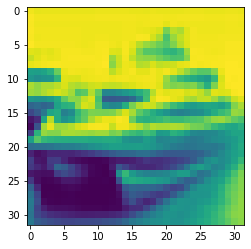

In [17]:
plt.imshow(X_gray[1].reshape(32,32))

In [253]:
X_=MinMaxScaler().fit_transform(X_)

In [332]:
proportion_range=np.arange(0.1,0.36,0.05)
random_state_range=np.arange(7,8)
r_cifar1=experiments(X_gray,y_,proportion_range,random_state_range,gamma=1,
                k=1,
                dm=0.1,dc=10,γ=1,
                alpha=1,r=100
               )

KISSME i 0
KISSME i 1
KISSME i 2
KISSME i 3
KISSME i 4
KISSME i 5
BregmanProj i 0
BregmanProj i 1
BregmanProj i 2
BregmanProj i 3
BregmanProj i 4
BregmanProj i 5
SCMPI p 0.2
SCMPI p 0.30000000000000004
SCMPI p 0.4000000000000001
SCMPI p 0.5000000000000001
SCMPI p 0.6000000000000001
SCMPI p 0.7000000000000002
kernelFDA i 0
kernelFDA i 1
kernelFDA i 2
kernelFDA i 3
kernelFDA i 4
kernelFDA i 5
ConsScalingProjLP i 0
ConsScalingProjLP i 1
ConsScalingProjLP i 2
ConsScalingProjLP i 3
ConsScalingProjLP i 4
ConsScalingProjLP i 5


# Results on CIFAR10

In [154]:
p_range=proportion_range
for criterion in arange(5):
        r=array(r_cifar).mean(axis=3)[:,:,0].T
        criteria=['KmAmi','KmAri','WardAmi','WardAri','runtime']
        cat=criteria[criterion]
        r_df=pd.DataFrame(data=np.round(r,5), index=p_range,
                                         columns=['CSP_LP','Bregman','KernelFDA','SC_MPI','KISSME'])
r_df

,CSP_LP,Bregman,KernelFDA,SC_MPI,KISSME
0.10,0.26375,0.26375,0.01994,0.27762,0.19148
0.15,0.35725,0.36170,0.00590,0.35788,0.27277
0.20,0.44525,0.44852,0.00651,0.46956,0.34875
0.25,0.52731,0.52896,0.01510,0.55233,0.42200
0.30,0.60661,0.60623,0.00177,0.63162,0.49466
0.35,0.68612,0.68314,0.00189,0.71017,0.56897


# Time costs on CIFAR10

In [158]:
p_range=proportion_range
for criterion in arange(5):
        r=array(r_cifar).mean(axis=3)[:,:,4].T
        criteria=['KmAmi','KmAri','WardAmi','WardAri','runtime']
        cat=criteria[criterion]
        r_df=pd.DataFrame(data=np.round(r,5), index=p_range,
                                         columns=['CSP_LP','Bregman','KernelFDA','SC_MPI','KISSME'])
r_df

,CSP_LP,Bregman,KernelFDA,SC_MPI,KISSME
0.10,0.10163,214.93932,36.03255,16.90993,6.96282
0.15,0.03562,266.80778,37.32223,17.01391,6.99212
0.20,0.03529,306.86063,38.02895,16.99328,7.29327
0.25,0.04361,336.53739,38.68433,17.19283,7.38339
0.30,0.04958,359.60901,39.65418,17.15837,7.58103
0.35,0.04593,376.94218,40.17864,17.41800,7.54307
